# Data

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

## 01 data loading

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
base_path = os.path.dirname(os.path.dirname(os.getcwd()))
x_mix_path = os.path.join(base_path,os.getenv("X_MIX_LABEL"))
y_mix_path = os.path.join(base_path,os.getenv("Y_LABEL"))

In [4]:
# 讀取 x 和 y 的資料
x_mix_gdp = pd.read_csv(x_mix_path)
y_mix_gdp = pd.read_csv(y_mix_path)

In [5]:
x_mix_gdp

,年份,季別,平均匯率(元/美元),國內投資毛額,投資率,工業生產指數,製造業銷售量指數,電力(企業)總用電量(十億度),進口物價基本分類指數,出口物價基本分類指數,...,機械及電機設備進口值(十億元),消費者物價指數,失業率,就業人數（千人）,總人口數(千人),景氣領先指標綜合指數(點),景氣同時指標綜合指數(點),gdp_t1,gdp_t2,gdp_t3
0,1982,1,37.91,102048,22.10,27.57,30.02,4.85,231.63,311.21,...,0.00,129.59,3.42,15826.00,42389.67,28.72,30.21,NaN,NaN,NaN
1,1982,2,38.78,143589,29.41,30.35,33.54,5.46,231.87,315.17,...,0.00,130.53,4.12,15577.33,42570.33,28.81,29.00,461774.0,NaN,NaN
2,1982,3,39.65,117934,24.09,30.06,32.76,5.81,234.50,317.22,...,0.00,133.10,5.75,16000.33,42742.00,28.50,28.87,488234.0,461774.0,NaN
3,1982,4,40.15,144192,28.92,29.86,32.70,5.66,234.53,315.38,...,0.00,132.11,6.41,16146.33,42952.67,29.05,29.58,489504.0,488234.0,461774.0
4,1983,1,39.97,99632,20.11,29.28,31.80,5.21,227.62,309.54,...,0.00,132.95,7.15,16260.67,43145.67,31.46,30.78,498511.0,489504.0,488234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2022,4,31.37,1588290,26.94,220.26,211.99,32.25,275.24,267.03,...,1162.68,241.98,8.42,26657.00,53816.00,218.08,215.55,5718537.0,5558046.0,5647656.0
164,2023,1,30.40,1520462,27.70,188.21,187.55,28.45,263.12,253.88,...,925.86,243.54,8.22,26787.33,54002.33,220.45,206.97,5896191.0,5718537.0,5558046.0
165,2023,2,30.71,1426025,24.97,188.72,195.97,31.84,257.68,252.57,...,890.73,245.20,8.12,26852.33,54117.67,219.13,204.78,5489013.0,5896191.0,5718537.0
166,2023,3,31.69,1364758,22.69,205.88,207.63,34.72,260.87,258.10,...,973.80,246.62,8.28,26936.00,54213.00,216.33,207.60,5710934.0,5489013.0,5896191.0


In [6]:
y_mix_gdp

,年份,季別,GDP
0,1982,1,461774
1,1982,2,488234
2,1982,3,489504
3,1982,4,498511
4,1983,1,495361
...,...,...,...
163,2022,4,5896191
164,2023,1,5489013
165,2023,2,5710934
166,2023,3,6016101


In [7]:
x_mix_gdp_drop=x_mix_gdp.drop(columns=['年份', '季別'])
y_mix_gdp_drop=y_mix_gdp.drop(columns=['年份', '季別'])

## 02 data MinMaxScaler

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

T3_X_scaled = scaler_X.fit_transform(x_mix_gdp_drop)
T3_y_scaled = scaler_y.fit_transform(y_mix_gdp_drop)

## 03 Feaature with T3

- T3_X_scaled 
- T3_y_scaled

In [10]:
T3_x,T3_y=[],[]


for i in range(5,len(T3_X_scaled)):
    T3_x.append([T3_X_scaled[i]])

for i in range(5,len(T3_y_scaled)):
    T3_y.append([T3_y_scaled[i]])


T3_x=np.array(T3_x)
T3_x=T3_x.reshape(T3_x.shape[0], -1)

T3_y=np.array(T3_y)
T3_y=T3_y.reshape(T3_y.shape[0], -1)

In [11]:
T3_x.shape

(163, 20)

In [12]:
T3_y.shape

(163, 1)

## 04 data spliting 80 & 20

In [13]:
train_size = int(len(T3_x) * 0.8)

In [14]:
train_x_t3, test_x_t3 = T3_x[:train_size], T3_x[train_size:]
train_y_t3, test_y_t3 = T3_y[:train_size], T3_y[train_size:]

In [15]:
len(train_x_t3)

130

In [16]:
len(train_y_t3,)

130

In [17]:
len(test_x_t3)

33

In [18]:
len(test_y_t3)

33

In [19]:
# training data start in 1983 Q2
train_y_t3[0]

array([0.01459457])

In [20]:
# training data stop in 2015 Q3
train_y_t3[-1]

array([0.64621251])

In [21]:
# testing data start in 2015 Q4
test_y_t3[0]

array([0.66447448])

In [22]:
# testing data start in 2023 Q4
test_y_t3[-1]

array([1.])

In [23]:
real_train_y = scaler_y.inverse_transform(train_y_t3)
real_test_y = scaler_y.inverse_transform(test_y_t3)

# Model

- training data (train_y_t3 & train_x_t3) : 1983 q2 to 2015 q3 (130)
    - train_x_t3_scaled (x)

- testing data (test_y_t3 & test_x_t3) : 2015 q4 to 2023 q4 (33)
    - test_x_t3_scaled (x)


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [25]:
# 評估
def eval_metrics(y_true, y_pred, name=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} ➤ MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")
    return mse, rmse, mae

In [26]:
def plot_gdp_forecast(year,name,train_actual, train_pred, test_actual, test_pred):
    plt.figure(figsize=(16, 7))

    # 畫出四條線
    plt.plot(year.iloc[5:135],train_actual, label='Train Actual', color='blue', linestyle='-')
    plt.plot(year.iloc[5:135],train_pred, label='Train Predicted', color='cyan', linestyle='--')
    plt.plot(year.iloc[135:],test_actual, label='Test Actual', color='green', linestyle='-')
    plt.plot(year.iloc[135:],test_pred, label='Test Predicted', color='orange', linestyle='--')

    # 標題與座標軸
    plt.title(f'GDP Forecast with {name}', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('GDP Value', fontsize=14)

    plt.xticks(year[::15],rotation=45)
    
    # 顯示圖例
    plt.legend()

    # 顯示網格
    plt.grid(True, linestyle='--', alpha=0.7)

    # 顯示圖片
    plt.show()

## GB

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

In [111]:

gb_model = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.95,
    max_features=1.0,
    random_state=42
)
gb_model.fit(train_x_t3, train_y_t3)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=12, max_features=1.0,
                          min_samples_leaf=5, min_samples_split=10,
                          n_estimators=1000, random_state=42, subsample=0.95)

In [112]:
# 預測
gb_y_train_pred = gb_model.predict(train_x_t3)
gb_y_test_pred = gb_model.predict(test_x_t3)


gb_y_train_pred = scaler_y.inverse_transform(gb_y_train_pred.reshape(-1, 1))
gb_y_test_pred = scaler_y.inverse_transform(gb_y_test_pred.reshape(-1, 1))

In [113]:
print("\n📊 訓練集表現：")
eval_metrics(real_train_y, gb_y_train_pred, "Train")

print("\n📊 測試集表現：")
eval_metrics(real_test_y, gb_y_test_pred, "Test")


📊 訓練集表現：
Train ➤ MSE: 7575884.56, RMSE: 2752.43, MAE: 1063.34

📊 測試集表現：
Test ➤ MSE: 1077247894027.07, RMSE: 1037905.53, MAE: 824324.76


(1077247894027.0686, 1037905.5323231824, 824324.7621231419)

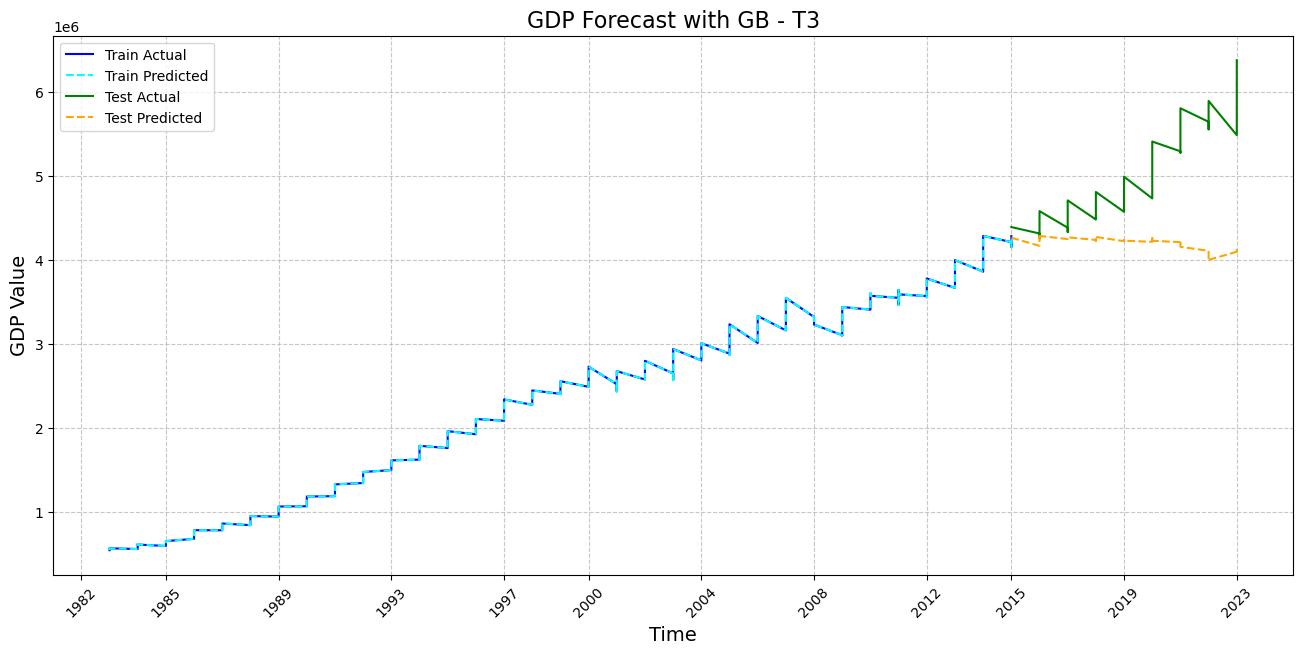

In [31]:
plot_gdp_forecast(y_mix_gdp['年份'],"GB - T3",real_train_y,gb_y_train_pred,real_test_y,gb_y_test_pred)

## Xgb

In [32]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [179]:
xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.95,
    colsample_bytree=0.8,
    min_child_weight=7,
    gamma=0,
    random_state=42,
    reg_alpha=1,        
    reg_lambda=2,
)

xgb_model.fit(train_x_t3, train_y_t3)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=7, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [180]:
# 預測
xgb_y_train_pred = xgb_model.predict(train_x_t3)
xgb_y_test_pred = xgb_model.predict(test_x_t3)

xgb_y_train_pred = scaler_y.inverse_transform(xgb_y_train_pred.reshape(-1, 1))
xgb_y_test_pred = scaler_y.inverse_transform(xgb_y_test_pred.reshape(-1, 1))

In [181]:
print("\n📊 訓練集表現：")
eval_metrics(real_train_y, xgb_y_train_pred, "Train")

print("\n📊 測試集表現：")
eval_metrics(real_test_y, xgb_y_test_pred, "Test")


📊 訓練集表現：
Train ➤ MSE: 37948717731.77, RMSE: 194804.31, MAE: 105371.29

📊 測試集表現：
Test ➤ MSE: 2533975857443.81, RMSE: 1591846.68, MAE: 1481365.41


(2533975857443.8145, 1591846.6815129572, 1481365.4090909092)

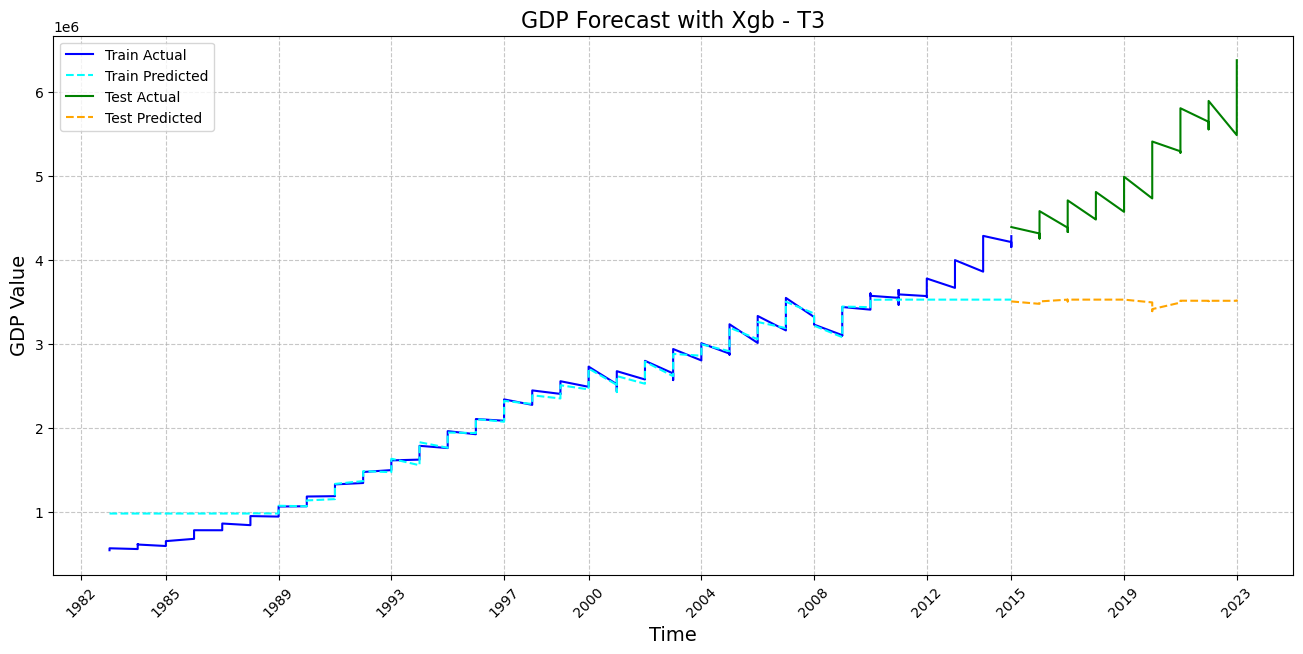

In [104]:
plot_gdp_forecast(y_mix_gdp['年份'],"Xgb - T3",real_train_y,xgb_y_train_pred,real_test_y,xgb_y_test_pred)

## RF

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [176]:
rf_model = RandomForestRegressor(
    n_estimators=700, 
    min_samples_leaf=2,
    max_depth =8,
    min_samples_split =4,   
    max_features=0.6, 
    random_state=42,
)
rf_model.fit(train_x_t3, train_y_t3)

/var/folders/2n/bnnv_n796gg_v86gjzv7j07c0000gn/T/ipykernel_23711/2940018070.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(train_x_t3, train_y_t3)


RandomForestRegressor(max_depth=8, max_features=0.6, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=700, random_state=42)

In [177]:
# 預測
rf_y_train_pred = rf_model.predict(train_x_t3)
rf_y_test_pred = rf_model.predict(test_x_t3)


rf_y_train_pred = scaler_y.inverse_transform(rf_y_train_pred.reshape(-1, 1))
rf_y_test_pred = scaler_y.inverse_transform(rf_y_test_pred.reshape(-1, 1))

In [178]:
print("\n📊 訓練集表現：")
eval_metrics(real_train_y, rf_y_train_pred, "Train")

print("\n📊 測試集表現：")
eval_metrics(real_test_y, rf_y_test_pred, "Test")


📊 訓練集表現：
Train ➤ MSE: 928584493.82, RMSE: 30472.68, MAE: 21816.62

📊 測試集表現：
Test ➤ MSE: 1171347808666.96, RMSE: 1082288.23, MAE: 893616.96


(1171347808666.963, 1082288.228092204, 893616.9645897042)

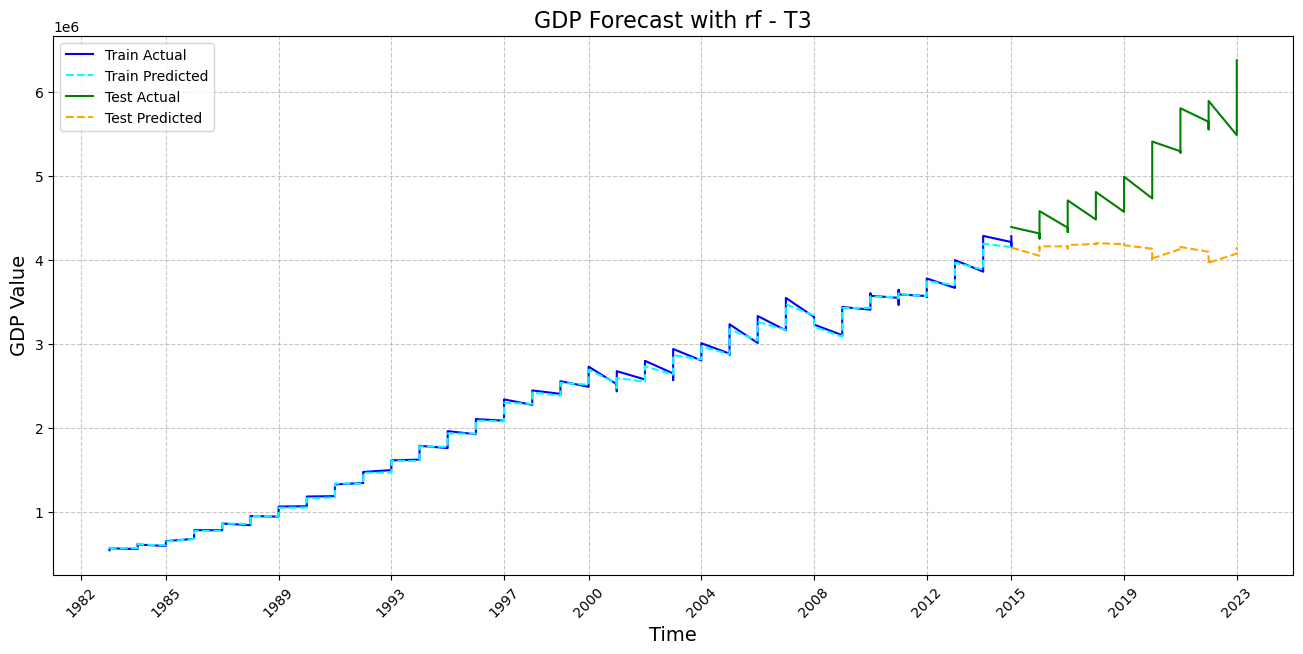

In [169]:
plot_gdp_forecast(y_mix_gdp['年份'],"rf - T3",real_train_y,rf_y_train_pred,real_test_y,rf_y_test_pred)